In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

In [13]:
df_data = pd.read_csv("../Data/preprocessed_alcohol_balance.csv")
# display(df_data)
print(df_data.shape)

(1232, 25)


In [38]:
print(list(df_data))

['TestID', 'Conditie', 'SubjectID', 'SegmentNr', 'WalkingDirection', 'SegmentData', 'Alcohol', 'Height', 'Weight', 'Age', 'BMI', 'Balance_MLrange', 'Balance_MLstdev', 'Balance_MLmeanVelocity', 'Balance_APrange', "Balance_APstdev'", 'Balance_APmeanVelocity', 'Balance_MeanVelocity', 'GaitVelocity', 'MovementVelocity', 'mad_SegmentData', 'mean_StepLength', 'Velocity', 'Alcohol_Class', 'std_SegmentData']


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


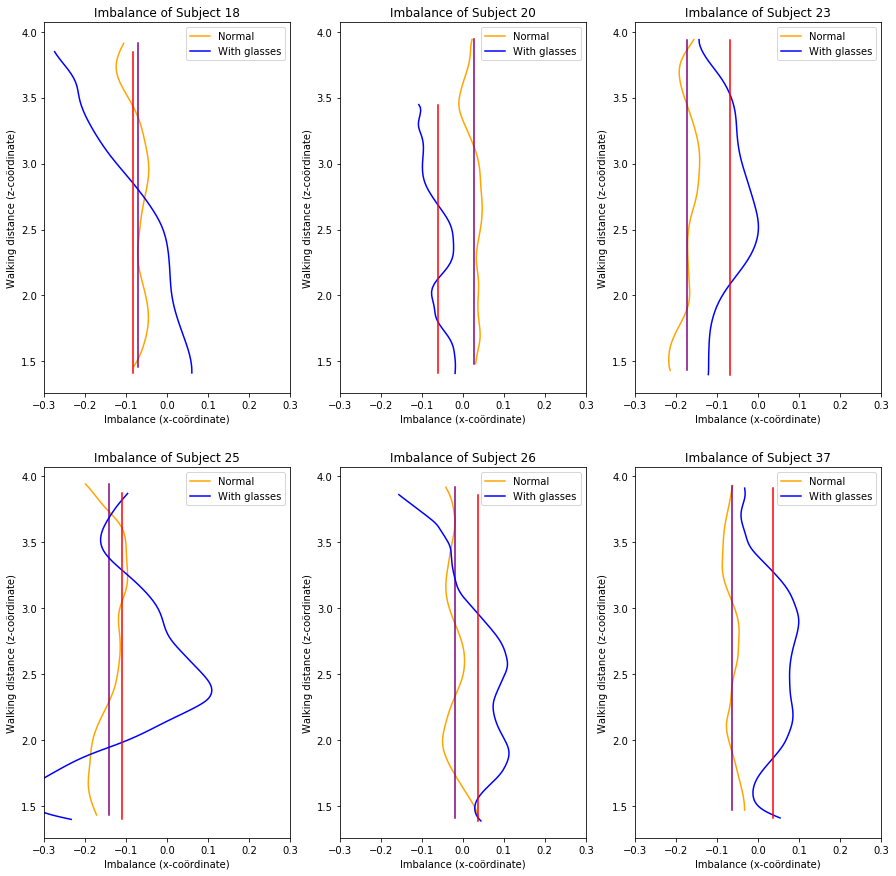

In [106]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(233, sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(234, sharex=ax1, sharey=ax1)
ax5 = fig.add_subplot(235, sharex=ax1, sharey=ax1)
ax6 = fig.add_subplot(236, sharex=ax1, sharey=ax1)

numbers = [36, 40, 48, 52, 56, 80]
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for number in range(0, 6):
    i = numbers[number]
    ax = axes[number]
    
    n_data = df_data["SegmentData"][i]
    n_data_arr = string_to_ndarray(n_data)
    n_x = n_data_arr[:,0]
    n_z = n_data_arr[:,2]

    b_data = df_data["SegmentData"][i + 616]
    b_data_arr = string_to_ndarray(b_data)
    b_x = b_data_arr[:,0]
    b_z = b_data_arr[:,2]

    n_ave = np.average(n_x)
    n_ave_arr = np.full((n_z.size), n_ave)
    b_ave = np.average(b_x)
    b_ave_arr = np.full((b_z.size), b_ave)

    title = 'Imbalance of Subject ' + str(df_data["SubjectID"][i])
    ax.set_title(title)
    ax.plot(n_x, n_z, color='orange', label='Normal')
    ax.plot(n_ave_arr, n_z, color='purple')
    ax.plot(b_x, b_z, color='blue', label='With glasses')
    ax.plot(b_ave_arr, b_z, color='red')
    ax.set_xlim(-0.3, 0.3)
    ax.set_xlabel('Imbalance (x-coördinate)')
    ax.set_ylabel('Walking distance (z-coördinate)')
    ax.legend()

fig.savefig('imbalance.png')
fig.show()